# Limpieza de datos

# 1. El problema del negocio

Una cafetería muy concurrida desea anticiparse a los meses en los que se producen la mayor cantidad de ventas para evitar problemas con el inventario.

#2. El set de datos

La información recolectada por la cafetería se encuentra en un archivo CSV (`dirty_cafe_sales.csv`) con 10,000 filas y 8 columnas.

Cada registro contiene 8 características (las 8 columnas) y una categoría. Las columnas son:
* Transaction ID: continene el identificador único para cada transacción.
* Item: es el nombre del producto vendido.
* Quantity: es la cantidad de productos vendidos para una transacción.
* Total Spent: Es el total de la transacción, se calcula multiplicando la cantidad por el precio del producto.
* Payment Method: Es el método de pago utilizado.
* Location: Es la ubicación donde se llevó a cabo la transacción.
* Transaction Date: fecha en que se realizó la transacción.

## Elementos del menú
El conjunto de datos incluye los siguientes elementos del menú con sus respectivos rangos de precios:

|Artículo	|Precio ($)
|Café|	2
|Té|	1.5
|Sándwich |	4
|Ensalada |	5
|Pastel	| 3
|Galleta	| 1
|Batido	| 4
|Jugo	| 3


In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
# Leer el archivo
uploaded = files.upload()  # Abre el explorador de archivos

# Cargar el primer archivo seleccionado
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

Saving dirty_cafe_sales.csv to dirty_cafe_sales.csv


# 3. Un primer vistazo al dataset

In [ ]:
print(data.shape)
print('-'*25)
data.head()

(10000, 8)
-------------------------


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
# Identificación de las variables categóricas y numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
# Verificación de tipos
print(data.dtypes)

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


# 4. Limpieza y Homolgación
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

* Conversión de tipos de datos
* Datos faltantes en algunas celdas
* Columnas irrelevantes (que no responden al problema que queremos resolver)
* Registros (filas) repetidos
* Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
* Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

## Columnas irrelevantes
Una columna irrelevante puede ser:

* Una columna que no contiene información relevante para el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con transacciones de la cafetería.
* Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna "Item" solo tuviésemos el nivel "unknown".
* Una columna numérica pero con un sólo valor. Por ejemplo si en la columna "Quatity" todos los valores fuesen iguales a 50.
* Columnas con información redundante. Por ejemplo si además de la columna "Transaction Date" y tuvieramos las columnas "month" "day" y "year", resultado de separar la columna anterior.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

## 4.1 Conversión a los tipos de datos adecuados

In [ ]:
# Convertir a números las columnas Quantity, Price Per Unit y Total Spent
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce').fillna(0.0).astype(float)

In [ ]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce').fillna(0).astype(int)

In [ ]:
data['Total Spent'] = data['Total Spent'].str.strip()
data['Total Spent'] = data['Total Spent'].replace('ERROR', '', regex=False)
data['Total Spent'] = pd.to_numeric(data['Total Spent'], errors='coerce').fillna(0.0).astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


## 4.2 Identificación y eliminación de duplicados

In [ ]:
# Eliminar columnas duplicadas
print('Tamaño del set antes de eliminar las filas repetidas:', data.shape)
data.drop_duplicates(inplace=True)
print('Tamaño del set despues de eliminar las filas repetidas:', data.shape)

Tamaño del set antes de eliminar las filas repetidas: (10000, 8)
Tamaño del set despues de eliminar las filas repetidas: (10000, 8)


## 4.3 Datos Faltantes
Algunas columnas (p. ej., Item, Payment Method, Location) pueden contener valores faltantes representados como Noneceldas vacías.

Para gestionar valores faltantes:

* Completaremos los valores numéricos faltantes con la mediana o la media.
* Reemplazaremos los valores categóricos faltantes con o "UNKNOWNK".

### Datos faltantes en variables numéricas

In [ ]:
# Ver datos estadísticos
data.describe()

,Quantity,Price Per Unit,Total Spent
count,10000.000000,10000.000000,10000.000000
mean,2.883400,2.792750,8.476350
std,1.528214,1.409422,6.172809
min,0.000000,0.000000,0.000000
25%,2.000000,1.500000,4.000000
50%,3.000000,3.000000,7.500000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [ ]:
# Rellenar los valores numéricos que faltan con la media.
data.loc[data['Price Per Unit'] == 0, 'Price Per Unit'] = 3
data.loc[data['Quantity'] == 0, 'Quantity'] = 3

In [ ]:
# Reemplazar los valores categóricos que faltan por UNKNOWN.
data['Item'] = data['Item'].fillna('UNKNOWN')
data['Payment Method'] = data['Payment Method'].fillna('UNKNOWN')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [ ]:
data = data.drop(columns=['Quatity'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


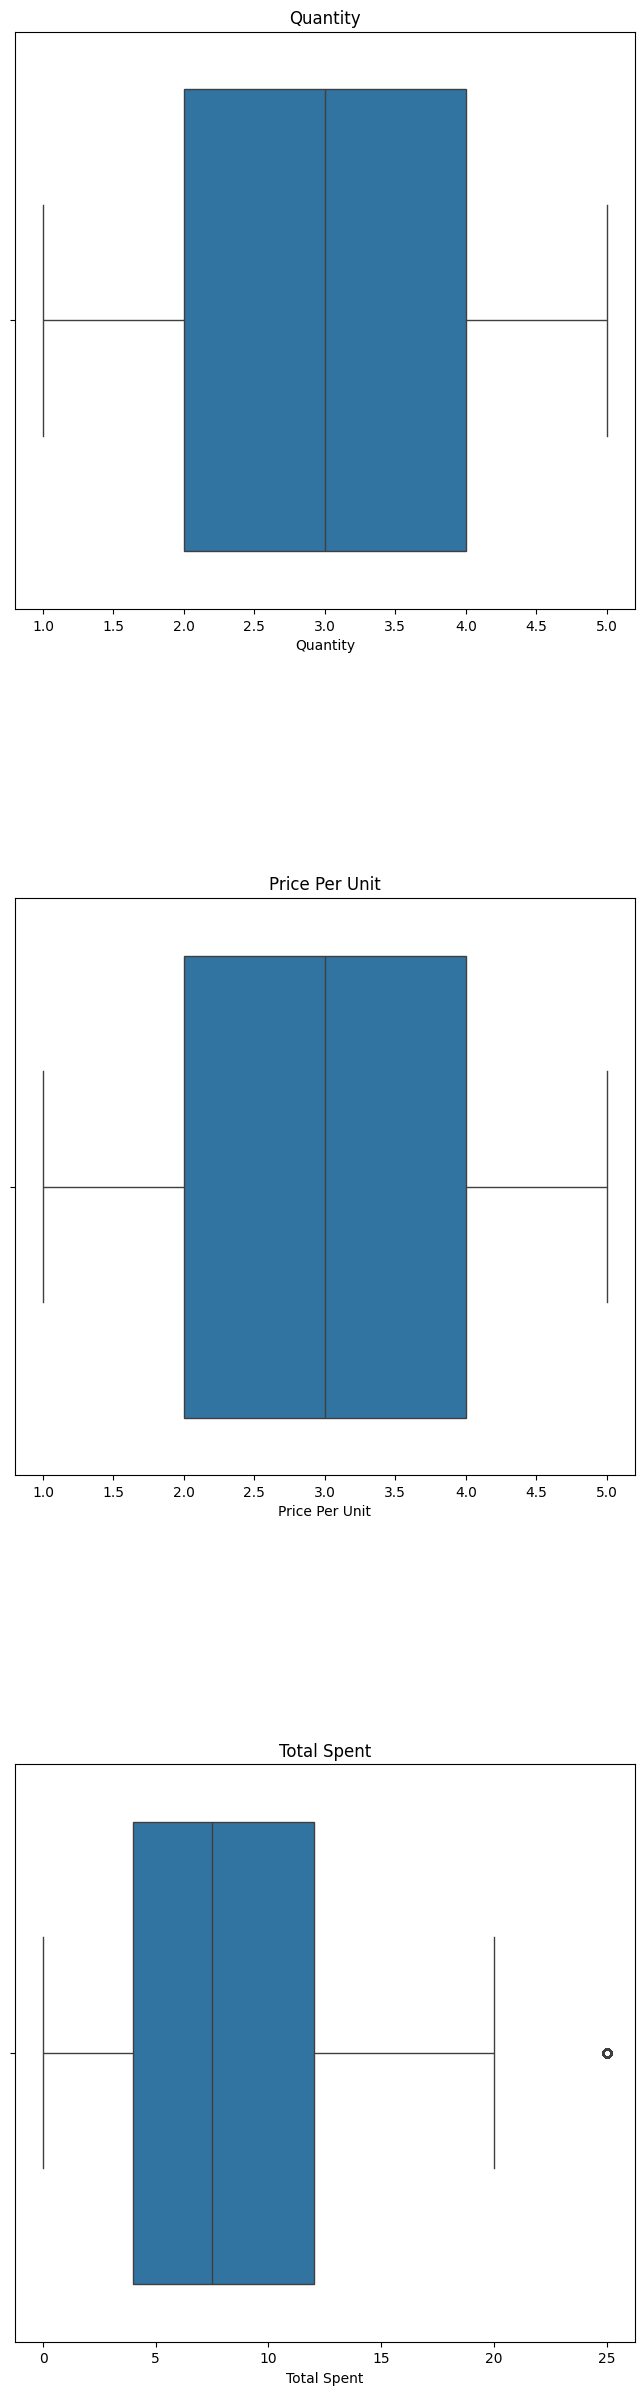

In [ ]:
# Validar outliers en las variables numéricas
# Generar gráficas individuales pues las variables numéricas están en rangos diferentes
cols_num = ['Quantity', 'Price Per Unit', 'Total Spent']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)

In [ ]:
# Validar los valores para los Menu Item
# Filtrar las filas donde el Item es "Coffee"
df_coffee = data[data['Item']== 'Coffee']

# Verificar si todos los valores de "Price Per Unit" son 2
if (df_coffee['Price Per Unit'] == 2).all():
  print('Todos los preciso son correctos para el Coffee')
else:
  print('No todos los preciso son correctos para el Coffee')


No todos los preciso son correctos para el Coffee


In [ ]:
# Modificar los valores de "Price Per Unit" para "Item" y el precio no sea el correspondiente
data.loc[(data['Item'] == 'Coffee') & (data['Price Per Unit'] != 2), 'Price Per Unit'] = 2

In [ ]:
data.loc[(data['Item'] == 'Tea') & (data['Price Per Unit'] != 1.5), 'Price Per Unit'] = 1.5
data.loc[(data['Item'] == 'Sandwich') & (data['Price Per Unit'] != 4), 'Price Per Unit'] = 4
data.loc[(data['Item'] == 'Salad') & (data['Price Per Unit'] != 5), 'Price Per Unit'] = 5
data.loc[(data['Item'] == 'Cake') & (data['Price Per Unit'] != 3), 'Price Per Unit'] = 3
data.loc[(data['Item'] == 'Cookie') & (data['Price Per Unit'] != 1), 'Price Per Unit'] = 1
data.loc[(data['Item'] == 'Smoothie') & (data['Price Per Unit'] != 4), 'Price Per Unit'] = 4
data.loc[(data['Item'] == 'Juice') & (data['Price Per Unit'] != 3), 'Price Per Unit'] = 3
data.loc[(data['Item'] == 'Jugo') & (data['Price Per Unit'] != 3), 'Price Per Unit'] = 3

In [ ]:
# Calcular Total Spent correctamente (Price Per Unit * Quantity)
data['Total Spent'] = data['Quantity'] * data['Price Per Unit']

In [ ]:
data.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [ ]:
data.describe()

,Quantity,Price Per Unit,Total Spent
count,10000.000000,10000.000000,10000.000000
mean,3.027100,2.947950,8.935650
std,1.384614,1.277196,5.913145
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


### Datos faltantes en variables categóricas

In [ ]:
# Rellenar los valores nulos de Payment Method y Location con Unknown
data['Payment Method'] = data['Payment Method'].fillna('UNKNOWN')
data['Location'] = data['Location'].fillna('UNKNOWN')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  int64  
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


/tmp/ipython-input-4276392183.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipython-input-4276392183.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipython-input-4276392183.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


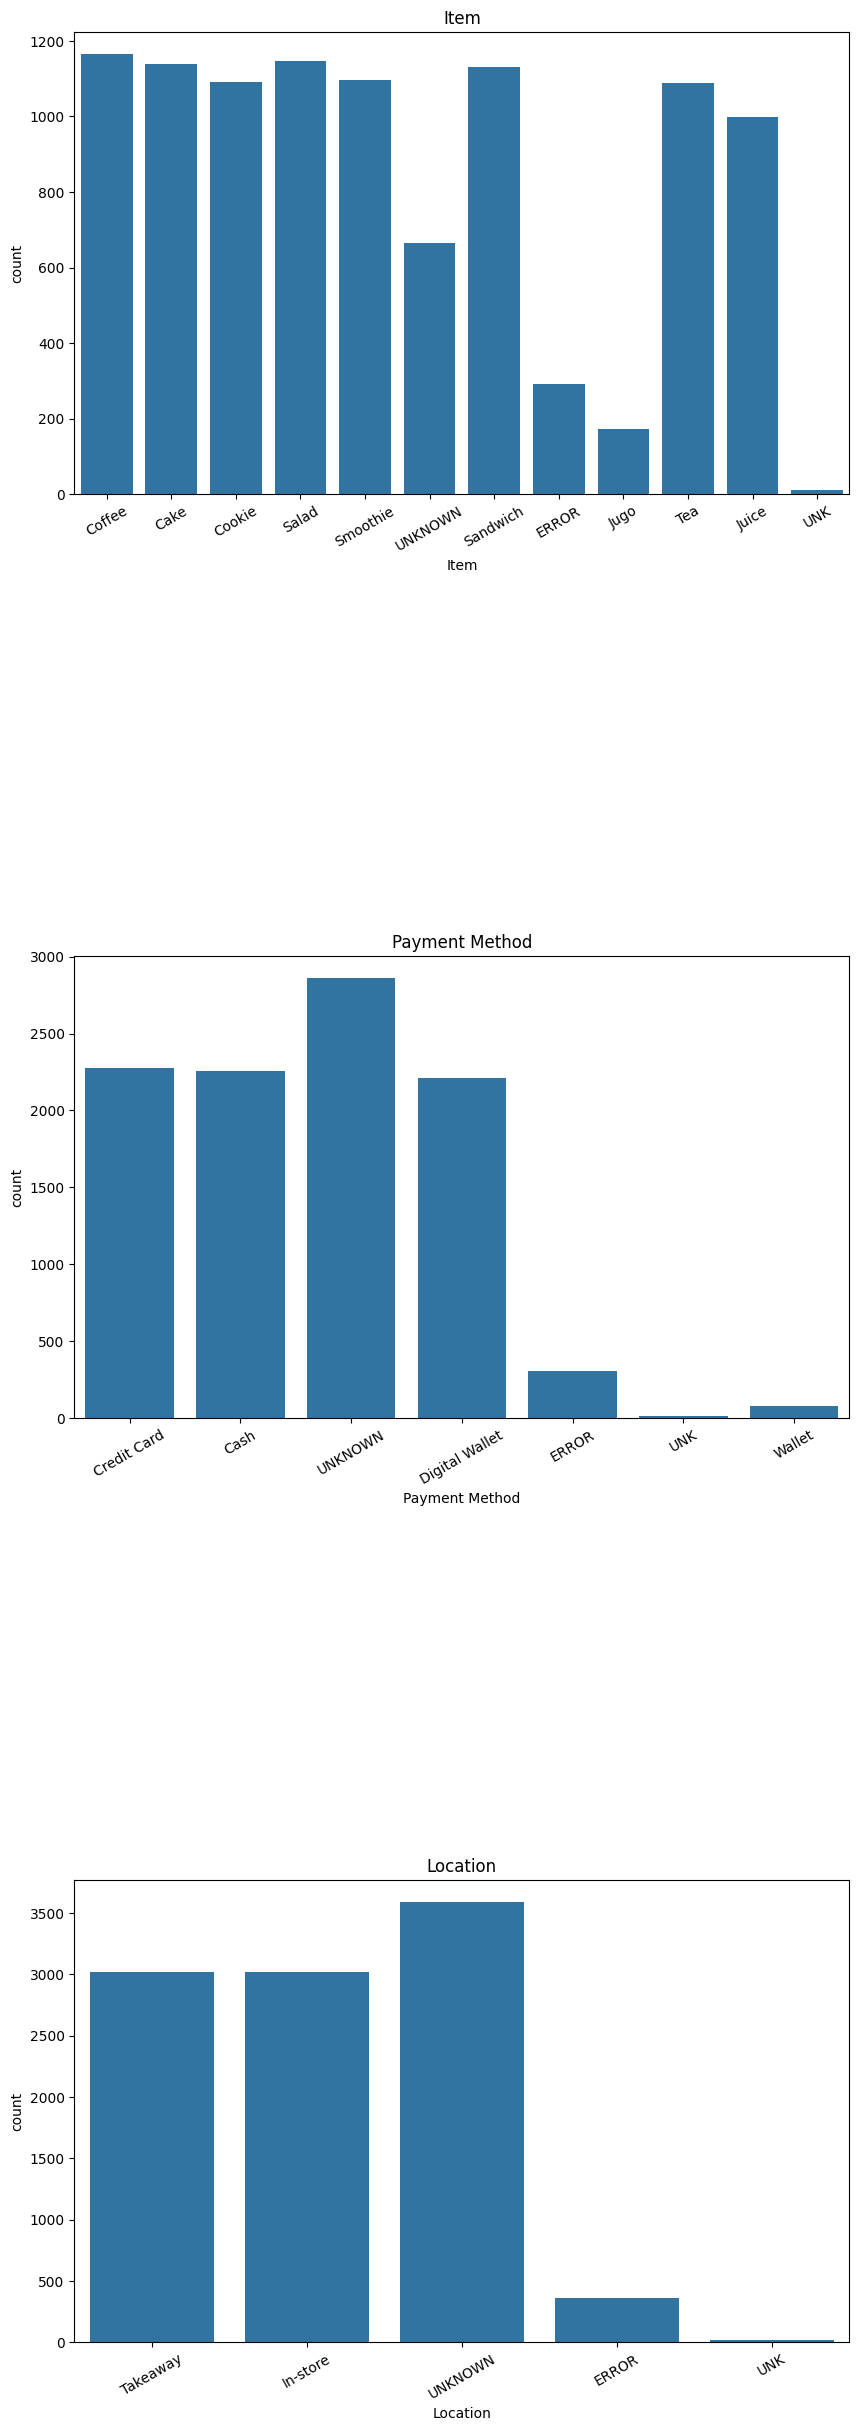

In [ ]:
# Verificar errores tipográficos
# Graficar los subniveles de cada variable categórica
cols_cat = ['Item', 'Payment Method', 'Location']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [ ]:
# Item: unificar jugo y juice
print(data['Item'].unique())
data['Item'] = data['Item'].str.replace('Jugo', 'Juice', regex=False)
print(data['Item'].unique())

print('-'*25)

# Item: unificar UNK y UNKNOWN
print(data['Item'].unique())
data['Item'] = data['Item'].str.replace('UNKNOWN', 'UNK', regex=False)
print(data['Item'].unique())

['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' 'ERROR'
 'Juice' 'Tea' 'UNK']
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' 'ERROR'
 'Juice' 'Tea' 'UNK']
-------------------------
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' 'ERROR'
 'Juice' 'Tea' 'UNK']
['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNK' 'Sandwich' 'ERROR'
 'Juice' 'Tea']


In [ ]:
# Payment Method: unificar Wallet y Digital Wallet
print(data['Payment Method'].unique())
data['Payment Method'] = data['Payment Method'].str.replace('Digital Wallet','Wallet', regex=False)
print(data['Payment Method'].unique())

print('-'*25)

# Payment Method: unificar UNK y UNKNOWN
print(data['Payment Method'].unique())
data['Payment Method'] = data['Payment Method'].str.replace('UNKNOWN','UNK', regex=False)
print(data['Payment Method'].unique())

['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' 'UNK' 'Wallet']
['Credit Card' 'Cash' 'UNKNOWN' 'Wallet' 'ERROR' 'UNK']
-------------------------
['Credit Card' 'Cash' 'UNKNOWN' 'Wallet' 'ERROR' 'UNK']
['Credit Card' 'Cash' 'UNK' 'Wallet' 'ERROR']


In [ ]:
# Location: unificar UNK y UNKNOWN
print(data['Location'].unique())
data['Location'] = data['Location'].str.replace('UNKNOWN','UNK', regex=False)
print(data['Location'].unique())

['Takeaway' 'In-store' 'UNKNOWN' 'ERROR' 'UNK']
['Takeaway' 'In-store' 'UNK' 'ERROR']


### Estandarizar el formato de la fecha

In [ ]:
# Convertir la columna a datetime, forzando el formato
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], format='%Y-%m-%d', errors='coerce')

# Identificar filas con fechas inválidas
fechas_invalidas = data[data['Transaction Date'].isna()]

# Mostrar las filas con fechas incorrectas
fechas_invalidas

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
11,TXN_3051279,Sandwich,2,4.0,8.0,Credit Card,Takeaway,NaT
29,TXN_7640952,Cake,4,3.0,12.0,Wallet,Takeaway,NaT
33,TXN_7710508,UNK,5,1.0,5.0,Cash,UNK,NaT
77,TXN_2091733,Salad,1,5.0,5.0,UNK,In-store,NaT
103,TXN_7028009,Cake,4,3.0,12.0,UNK,Takeaway,NaT
...,...,...,...,...,...,...,...,...
9933,TXN_9460419,Cake,1,3.0,3.0,UNK,Takeaway,NaT
9937,TXN_8253472,Cake,1,3.0,3.0,UNK,UNK,NaT
9949,TXN_3130865,Juice,3,3.0,9.0,UNK,In-store,NaT
9983,TXN_9226047,Smoothie,3,4.0,12.0,Cash,UNK,NaT


In [ ]:
# Interpolar las fechas apropiadas para las transacciones
data['Transaction Date'] = data['Transaction Date'].interpolate(method='linear')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              10000 non-null  object        
 2   Quantity          10000 non-null  int64         
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  object        
 6   Location          10000 non-null  object        
 7   Transaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


In [ ]:
# Guardar el dataset limpio
ruta = "clean_cafe_sales.csv"
data.to_csv(ruta, index=False)